
Solving the Teukolsky equation in Schwarzschild spacetime ($ a = 0$)

In [8]:
from hblteuk import *
import time

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [3]:
l = 10
omega = 4.3
cs, domain=chebteuk(2, l, omega)
csm2 = flip_plus_2_teuk(l, omega, cs, domain)
f=ch.Chebyshev(cs, domain=domain)
fm2=ch.Chebyshev(csm2, domain=domain)
print(domain)
print(f(0.0001))

[0.0, 0.044125229810475015]
(0.9997993985750863-0.001115207187619538j)


In [4]:
np.max(np.abs(checkteuk(-2, l, omega, fm2)))

4.6214104379737397e-10

In [37]:
psi = HyperboloidalTeukolsky(2, 60, 0.5)
start = time.time()
psi.solve_teukolsky()
end = time.time()
print(end-start)

0.15711212158203125


In [49]:
rstart = 150
rvals = np.linspace(rstart, rstart + 2*np.pi*5/psi.frequency,num=300)
psivals = psi.rteval(rvals)
#plt.plot(rvals, np.log(np.abs(np.real(psivals))))
#plt.plot(rvals, np.log(np.abs(np.imag(psivals))))
#plt.show()
print(2/psi.domains[1])

7300.0043835603265


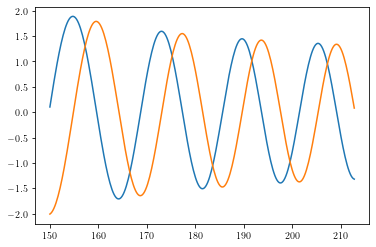

In [45]:
plt.plot(rvals, np.real(rvals**(1+2*psi.s)*psivals))
plt.plot(rvals, np.imag(rvals**(1+2*psi.s)*psivals))
plt.show()

In [13]:
import time
start = time.time()
s = 2
l = 60
omega = 0.03
cs, domain=multichebteuk(s, l, omega)
end = time.time()
print(end-start)

0.14741873741149902


In [259]:
n=cs.size - 1
ftest=ch.Chebyshev(cs[n], domain=[domain[n],domain[n+1]])
print([domain[n],domain[n+1]])
ftest(0.4999)

[0.4788618422717033, 0.5]


(-2.0601874931681734e+157-4.298198902127338e+156j)

In [260]:
n=0
ftest=ch.Chebyshev(cs[n], domain=[domain[n],domain[n+1]])
print([domain[n],domain[n+1]])
ftest(0.0001)

[0.0, 1.642042592356615e-05]


(-2.8058523160718785e+22+1.078241494529699e+23j)

In [261]:
n_cs = cs.size
flist = np.empty(n_cs, dtype=object)
for i in range(n_cs):
    flist[i] = ch.Chebyshev(cs[i], domain=[domain[i], domain[i+1]])

In [262]:
def multi_chebyshev(sigma, funcs, domains):
    for i in range(funcs.size):
        if sigma <= domain[i+1]:
            return funcs[i](sigma)
    return 0

multi_chebyshev_vec = np.vectorize(multi_chebyshev, excluded=[1, 2])

In [263]:
def multi_chebyshev_x(x, funcs, domains):
    return multi_chebyshev_vec(sigmaOfX(x, domains[0], domains[-1]), funcs, domains)
def log_multi_chebyshev(x, funcs, domains):
    return np.log(np.abs(multi_chebyshev_vec(sigmaOfX(x, domains[0], domains[-1]), funcs, domains)))

In [264]:
ctestCoeffs = ch.chebinterpolate(log_multi_chebyshev, 1000, args=(flist, domain))
ctest = ch.Chebyshev(ctestCoeffs, domain=[domain[0], domain[-1]])
#ctestCoeffs2 = ch.chebinterpolate(multi_chebyshev_x, 50, args=(flist, domain))
#ctest2 = ch.Chebyshev(ctestCoeffs2, domain=[domain[0], domain[-1]])

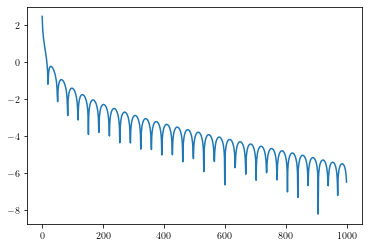

In [265]:
plt.plot(np.log10(np.abs(ctestCoeffs)))
#plt.plot(np.log10(np.abs(ctestCoeffs2)))
plt.show()

In [266]:
sigma = np.linspace(domain[0], domain[-1], num= 200)
psi = multi_chebyshev_vec(sigma, flist, domain)
psiComp = np.exp(ctest(sigma))
psiComp2 = ctest2(sigma)

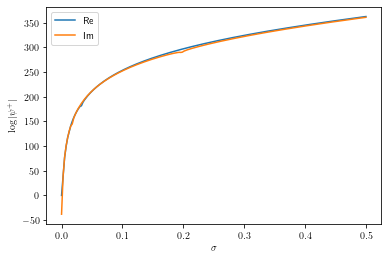

In [267]:
plt.plot(sigma, np.log(np.abs(np.real(psi))), label=r"Re")
plt.plot(sigma, np.log(np.abs(np.imag(psi))), label=r"Im")
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\log|\psi^+|$')
plt.legend()
plt.show()

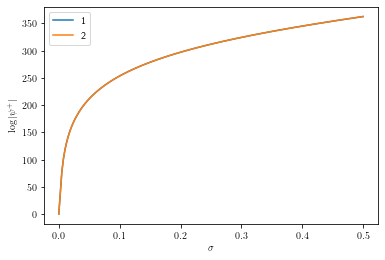

In [268]:
plt.plot(sigma, np.log(np.abs(psi)), label=r"1")
plt.plot(sigma, np.log(psiComp), label=r"2")
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\log|\psi^+|$')
plt.legend()
plt.show()

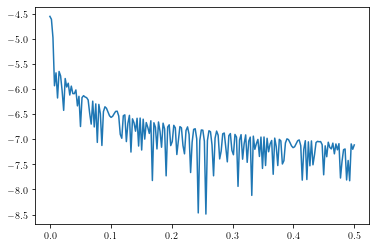

In [269]:
plt.plot(sigma, np.log10(np.abs(1-psiComp/np.abs(psi))))
#plt.plot(sigma, np.log10(np.abs(1-np.abs(psiComp2)/np.abs(psi))))
#plt.plot(sigma, np.log10(np.abs(1-psiComp2/psi)))
plt.show()

In [256]:
rtest=2.2/domain[1]
print(rtest)
print(rescaleteuk(2, omega, rtest)*f(2/rtest))
print(rescaleteuk(-2, omega, rtest)*fm2(2/rtest))

13392.722891122628
(-6.669782228559607e-22+2.2229926217741414e-21j)
(-690419356873.9948+2300830079531.1724j)


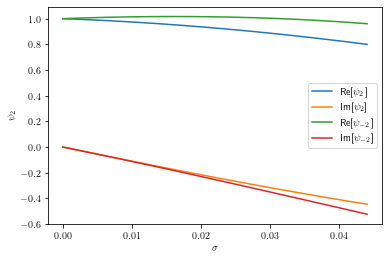

In [257]:
plotdata = f.linspace()
plotdata2 = fm2.linspace()
plt.plot(plotdata[0], np.real(plotdata[1]), label=r"Re[$\psi_2$]")
plt.plot(plotdata[0], np.imag(plotdata[1]), label=r"Im[$\psi_2$]")
#plt.plot(plotdata[0], np.abs(plotdata[1]), label=r"Abs[$\psi_2$]")
plt.plot(plotdata2[0], np.real(plotdata2[1]), label=r"Re[$\psi_{-2}$]")
plt.plot(plotdata2[0], np.imag(plotdata2[1]), label=r"Im[$\psi_{-2}$]")
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\psi_2$')
plt.legend()
plt.show()

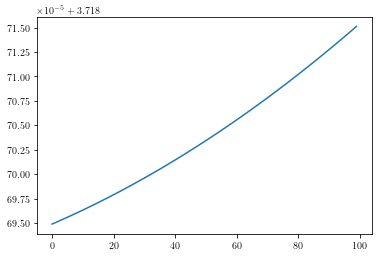

In [14]:
plt.plot(np.log10(np.abs(checkteuk(2, l, omega, f))))
plt.show()